<a href="https://colab.research.google.com/github/taetae991202/Final_term_project/blob/main/final_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('/content/drive/MyDrive/data/data/train_data/train_task_3_4.csv')
print(data.shape)
data.head()

(1382727, 6)


,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [65]:
# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), df['IsCorrect'].var())

0 2812 0.44345661450924606 0.00937010933612387 0.24689064450621495
1 14 0.5714285714285714 0.13725270326150324 0.26373626373626374
2 2313 0.3852140077821012 0.01012089927190456 0.23692660859262452
3 2672 0.8087574850299402 0.007609645680958906 0.15472672214537603
4 1704 0.4014084507042254 0.011878216105763999 0.24042079842531408
5 833 0.1908763505402161 0.013624539924512865 0.1546281974328193
6 1718 0.5285215366705471 0.012046950521125473 0.24933165096280901
7 89 0.34831460674157305 0.050788279503341166 0.2295709908069459
8 2327 0.3919209282337774 0.010122188032315155 0.23842137293671323
9 834 0.36330935251798563 0.016664029411268603 0.23159335676716727
10 1572 0.4020356234096692 0.012370345562832941 0.2405560063686118
11 2171 0.45831414094887146 0.010696101386212332 0.2483766957400336
12 1701 0.3991769547325103 0.011877678361556275 0.23997579278625022
13 1259 0.6965845909451946 0.012961803326362887 0.21152250694838182
14 1697 0.6682380671773719 0.01143315150226891 0.22182666970569595


In [66]:
df_q =pd.DataFrame({'QuestionId':[], 'n':[], 'mean':[], 'sem':[], 'var':[]})
len(df_q)
for k,df in data.groupby('QuestionId'):
    df_q.loc[len(df_q)] = [k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), df['IsCorrect'].var()]

print(df_q.shape)
val_q = df_q.set_index('QuestionId')
val_q.head(20)

(948, 5)


,n,mean,sem,var
QuestionId,,,,
0.0,2812.0,0.443457,0.009370,0.246891
1.0,14.0,0.571429,0.137253,0.263736
2.0,2313.0,0.385214,0.010121,0.236927
3.0,2672.0,0.808757,0.007610,0.154727
4.0,1704.0,0.401408,0.011878,0.240421
5.0,833.0,0.190876,0.013625,0.154628
6.0,1718.0,0.528522,0.012047,0.249332
7.0,89.0,0.348315,0.050788,0.229571
8.0,2327.0,0.391921,0.010122,0.238421


In [67]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('/content/drive/MyDrive/data/data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<Axes: >

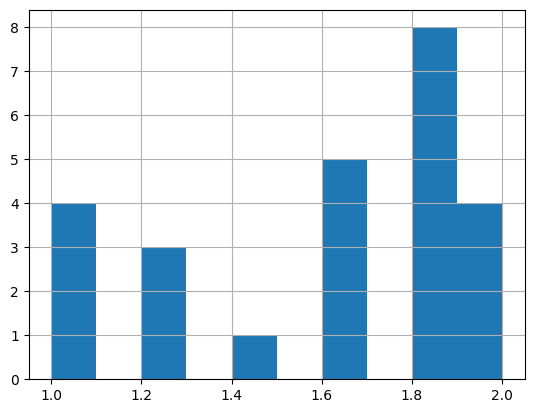

In [68]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<Axes: >

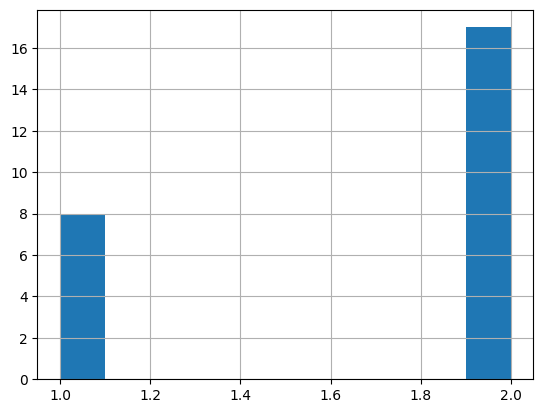

In [69]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [70]:
print(eval_validation.shape)
eval_validation.head()

(25, 11)


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2


In [71]:
# preprocessing
df_q.reset_index(drop=True, inplace=True)
df_q.drop(columns='QuestionId', inplace=True)
df_q

,n,mean,sem,var
0,2812.0,0.443457,0.009370,0.246891
1,14.0,0.571429,0.137253,0.263736
2,2313.0,0.385214,0.010121,0.236927
3,2672.0,0.808757,0.007610,0.154727
4,1704.0,0.401408,0.011878,0.240421
...,...,...,...,...
943,2653.0,0.566528,0.009623,0.245667
944,189.0,0.142857,0.025521,0.123100
945,2337.0,0.422336,0.010220,0.244073
946,111.0,0.459459,0.047516,0.250614


In [211]:
# scailing

max_df = np.max(df_q, axis = 0)
print(max_df)
df_q_scaled = df_q.values
print(df_q_scaled)
print(df_q_scaled[:].shape)

n       2966.000000
mean       1.000000
sem        0.288675
var        0.333333
dtype: float64
[[2.81200000e+03 4.43456615e-01 9.37010934e-03 2.46890645e-01]
 [1.40000000e+01 5.71428571e-01 1.37252703e-01 2.63736264e-01]
 [2.31300000e+03 3.85214008e-01 1.01208993e-02 2.36926609e-01]
 ...
 [2.33700000e+03 4.22336329e-01 1.02195160e-02 2.44072793e-01]
 [1.11000000e+02 4.59459459e-01 4.75161661e-02 2.50614251e-01]
 [6.19000000e+02 6.17124394e-01 1.95533407e-02 2.36664209e-01]]
(948, 4)


In [212]:
# k=2, k-means clustering, using all
from sklearn.cluster import KMeans

model1 = KMeans(n_clusters=2)
model1.fit(df_q_scaled)

# model1.predict(df_q_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [213]:
eval_validation['left_predict'] = model1.predict(df_q_scaled[eval_validation['left']])
eval_validation['right_predict'] = model1.predict(df_q_scaled[eval_validation['right']])

eval_validation
# It would be a good question when the cluster is 1.

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,right_predict,vs_result,is_correct,left_predict
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0,1,False,0
1,16,16,285,609,2,2,2,2.0,2,2.0,2,1,1,False,1
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0,2,True,0
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0,1,False,1
4,33,33,16,586,1,1,2,2.0,2,1.6,2,1,1,False,1
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0,1,False,1
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0,2,False,1
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0,1,False,1
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0,2,False,0
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0,1,True,1


In [214]:
eval_validation.drop(columns=['left_predict', 'left_predict'], inplace=True)

In [215]:
# find centroid
model1.cluster_centers_

array([[4.03379310e+02, 4.63046860e-01, 5.05854840e-02, 2.31973336e-01],
       [2.24899446e+03, 5.39999859e-01, 1.01250270e-02, 2.25045051e-01]])

In [216]:
centroid1, centroid2 = model1.cluster_centers_

# 두개의 question 정보를 받아 비교하는 모델
def vs_model1(q1, q2):
  # 거리 구하기
  distance1 = np.linalg.norm(centroid2 - q1, axis=1)
  distance2 = np.linalg.norm(centroid2 - q2, axis=1)

  result = distance1 > distance2
  result = np.where(result==True, 1, 2)
  return result

In [217]:
eval_validation['vs_result'] = vs_model1(df_q_scaled[eval_validation['left']], df_q_scaled[eval_validation['right']])
eval_validation['is_correct'] = eval_validation['preference'] == eval_validation['vs_result']

eval_validation
print(eval_validation['is_correct'].value_counts())

True     14
False    11
Name: is_correct, dtype: int64


In [218]:
# k=2, k-means clustering, using mean, sem, var
df_q_scaled2 = df_q_scaled[:, 1:]

from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=2)
model2.fit(df_q_scaled2)

# model1.predict(df_q_scaled2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [219]:
centroid1, centroid2 = model2.cluster_centers_

# 두개의 question 정보를 받아 비교하는 모델
def vs_model2(q1, q2):
  # 거리 구하기
  distance1 = np.linalg.norm(centroid1 - q1, axis=1)
  distance2 = np.linalg.norm(centroid1 - q2, axis=1)

  result = distance1 > distance2
  result = np.where(result==True, 1, 2)
  return result

In [220]:
eval_validation['vs_result'] = vs_model2(df_q_scaled2[eval_validation['left']], df_q_scaled2[eval_validation['right']])
eval_validation['is_correct'] = eval_validation['preference'] == eval_validation['vs_result']

print(eval_validation['is_correct'].value_counts())
eval_validation

True     19
False     6
Name: is_correct, dtype: int64


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,right_predict,vs_result,is_correct
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0,2,True
1,16,16,285,609,2,2,2,2.0,2,2.0,2,1,2,True
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0,2,True
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0,2,True
4,33,33,16,586,1,1,2,2.0,2,1.6,2,1,2,True
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0,2,True
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0,1,True
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0,2,True
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0,1,True
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0,1,True


In [221]:
# k=2, k-means clustering  mean 와 var
df_q_scaled3 = df_q_scaled[:,1::2]
print(df_q_scaled3.shape)

from sklearn.cluster import KMeans

model3 = KMeans(n_clusters=2)
model3.fit(df_q_scaled3)

# model3.predict(df_q_scaled3)

(948, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [222]:
centroid1, centroid2 = model3.cluster_centers_

# 두개의 question 정보를 받아 비교하는 모델
def vs_model3(q1, q2):
  # 거리 구하기
  distance1 = np.linalg.norm(centroid1 - q1, axis=1)
  distance2 = np.linalg.norm(centroid1 - q2, axis=1)

  result = distance1 > distance2
  result = np.where(result==True, 1, 2)
  return result

In [223]:
eval_validation['vs_result'] = vs_model3(df_q_scaled3[eval_validation['left']], df_q_scaled3[eval_validation['right']])
eval_validation['is_correct'] = eval_validation['preference'] == eval_validation['vs_result']

print(eval_validation['is_correct'].value_counts())
eval_validation

True     19
False     6
Name: is_correct, dtype: int64


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,right_predict,vs_result,is_correct
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0,2,True
1,16,16,285,609,2,2,2,2.0,2,2.0,2,1,2,True
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0,2,True
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0,2,True
4,33,33,16,586,1,1,2,2.0,2,1.6,2,1,2,True
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0,2,True
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0,1,True
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0,2,True
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0,1,True
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0,1,True


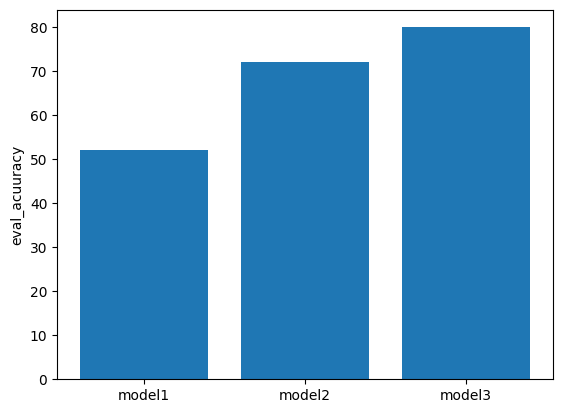

In [224]:
x = np.arange(3)
percent  = [13/25 * 100, 18 /25 * 100, 20 / 25 * 100]
model_name = ['model1', 'model2', 'model3']
plt.bar(x, percent)
plt.xticks(x, model_name)
plt.ylabel('eval_acuuracy')
plt.show()

In [225]:
print(df_q_scaled3.shape)
df_q_scaled3

(948, 2)


array([[0.44345661, 0.24689064],
       [0.57142857, 0.26373626],
       [0.38521401, 0.23692661],
       ...,
       [0.42233633, 0.24407279],
       [0.45945946, 0.25061425],
       [0.61712439, 0.23666421]])

In [226]:
print(len(df_q_scaled3))
q1 = [df_q_scaled3[1]]
q2 = [df_q_scaled3[2]]
print(q1)
print(q2)
distance1 = np.linalg.norm(centroid1 - q1, axis=1)
distance2 = np.linalg.norm(centroid1 - q2, axis=1)
print(distance1, distance2)
distance1 == distance2
if distance1 == distance2:
  print(1)

948
[array([0.57142857, 0.26373626])]
[array([0.38521401, 0.23692661])]
[0.10282486] [0.27847345]


In [227]:
# 두개의 question 정보를 받아 비교하는 모델
def vs_model(q1, q2):
  # 거리 구하기
  distance1 = np.linalg.norm(centroid1 - q1, axis=1)
  distance2 = np.linalg.norm(centroid1 - q2, axis=1)

  result = distance1 > distance2
  result = np.where(result==True, 1, 2)
  return result

In [228]:
# ranking
centroid1, centroid2 = model3.cluster_centers_


template = pd.read_csv('/content/drive/MyDrive/template (1).csv')

# raking list
ranking = []

for idx1 in range(len(df_q_scaled3)):
  q1 = df_q_scaled3[idx1]

  count = 0
  for idx2 in range(len(df_q_scaled3)):
    if idx1 == idx2:
      continue

    q2 = df_q_scaled3[idx2]
    result = vs_model([q1], [q2])[0]

    if result == 1:
      count += 1

  ranking.append(count)

print(ranking)

[583, 275, 716, 418, 670, 941, 362, 784, 696, 763, 669, 546, 676, 85, 7, 518, 215, 611, 832, 76, 81, 656, 122, 564, 118, 425, 364, 560, 461, 132, 419, 18, 715, 917, 455, 393, 660, 154, 437, 551, 781, 803, 766, 246, 824, 620, 903, 183, 723, 558, 198, 360, 652, 503, 628, 599, 389, 718, 631, 430, 663, 931, 566, 841, 290, 483, 383, 755, 881, 372, 861, 678, 342, 201, 469, 191, 429, 799, 33, 801, 104, 428, 101, 345, 710, 601, 266, 878, 375, 107, 236, 512, 412, 933, 911, 720, 687, 219, 517, 530, 14, 595, 575, 234, 936, 288, 321, 744, 812, 562, 892, 40, 788, 563, 487, 630, 348, 859, 382, 556, 759, 771, 24, 582, 724, 317, 912, 606, 883, 489, 785, 540, 704, 16, 57, 572, 758, 105, 117, 812, 661, 557, 893, 125, 480, 493, 934, 184, 729, 821, 278, 447, 783, 249, 346, 945, 476, 93, 671, 753, 162, 811, 701, 263, 133, 283, 788, 635, 97, 907, 94, 411, 855, 774, 731, 859, 235, 490, 569, 883, 914, 830, 908, 538, 119, 19, 742, 449, 680, 770, 44, 791, 889, 331, 543, 242, 267, 786, 465, 311, 61, 673, 320, 50

In [229]:
template['ranking'] = ranking
template

,QuestionId,ranking
0,0,583
1,1,275
2,2,716
3,3,418
4,4,670
...,...,...
943,943,270
944,944,947
945,945,632
946,946,544


In [230]:
template.to_csv('/content/drive/MyDrive/20212780.csv')

In [235]:
df_q['ranking'] = template['ranking']
df_q.head()

,n,mean,sem,var,ranking
0,2812.0,0.443457,0.009370,0.246891,583
1,14.0,0.571429,0.137253,0.263736,275
2,2313.0,0.385214,0.010121,0.236927,716
3,2672.0,0.808757,0.007610,0.154727,418
4,1704.0,0.401408,0.011878,0.240421,670


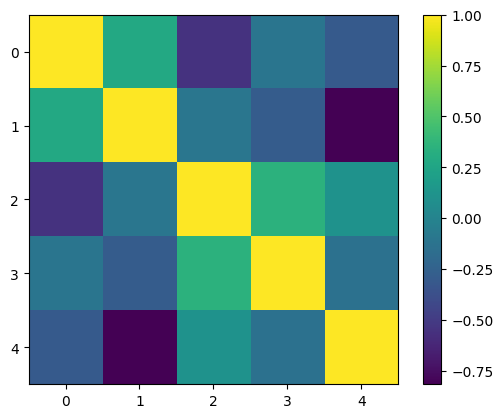

In [238]:
# correlations heatmap
cor = df_q.corr()
plt.imshow(cor)
plt.colorbar()

In [239]:
# Table correlations
df_q.corr()

,n,mean,sem,var,ranking
n,1.000000,0.281075,-0.550680,-0.108843,-0.300297
mean,0.281075,1.000000,-0.101833,-0.285815,-0.817629
sem,-0.550680,-0.101833,1.000000,0.353861,0.112050
var,-0.108843,-0.285815,0.353861,1.000000,-0.137048
ranking,-0.300297,-0.817629,0.112050,-0.137048,1.000000


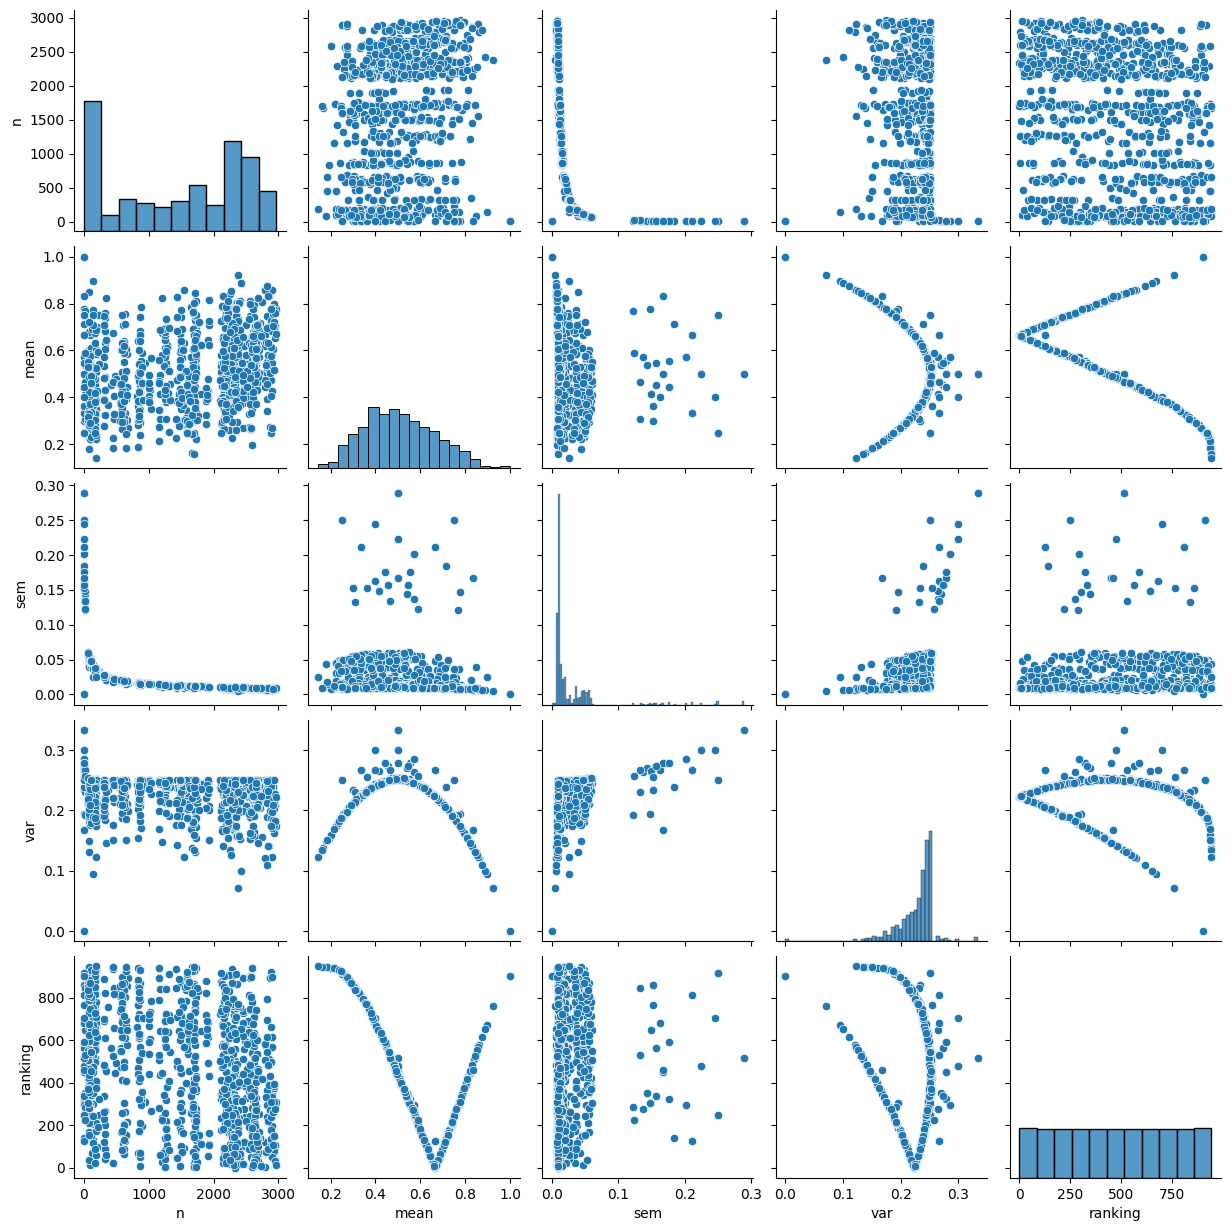

In [241]:
sns.pairplot(df_q)

Text(0.5, 0, 'mean')

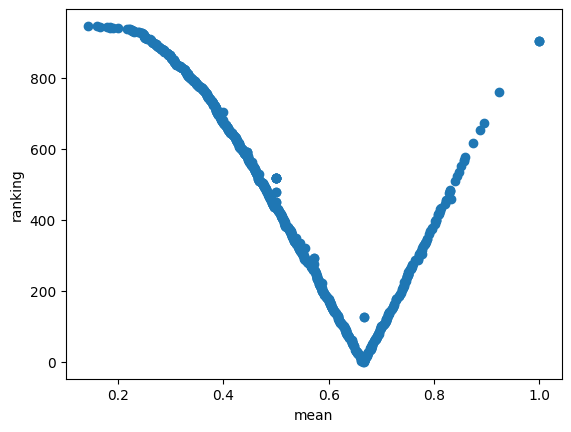

In [250]:
plt.scatter( df_q['mean'], df_q['ranking'],)
plt.ylabel('ranking')
plt.xlabel('mean')

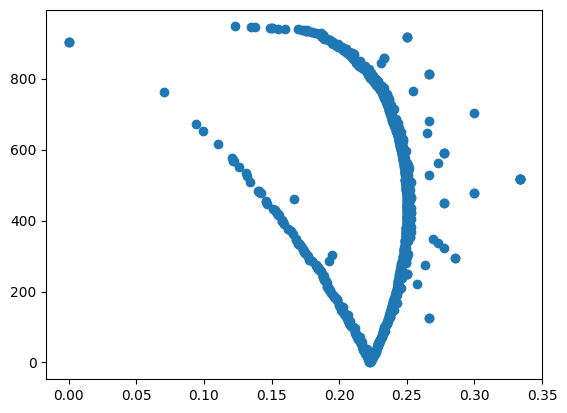

In [251]:
plt.scatter(df_q['var'], df_q['ranking'], )